In [1]:
import pandas as pd

# Tokenização e Segmentação de Sentenças
A tokenização e a segmentação da palavras podem ser realizadas com a lib `Stanza`, as quais são executadas em conjunto pelo `TokenizeProcessor`. Este processador divide o texto de entrada em tokens e frases. Este processador pode ser chamado pela função `tokenize`.

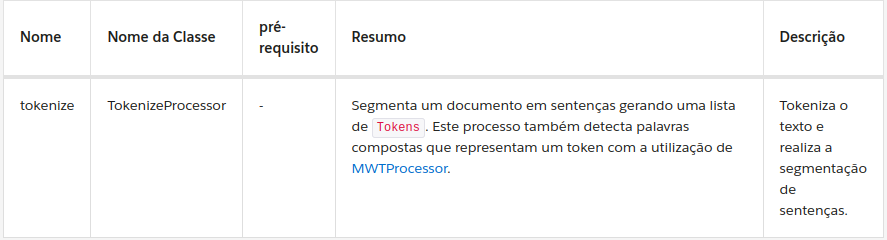

## Opções
A seguir, algumas configurações para configuração do `TokenizeProcessor`: 

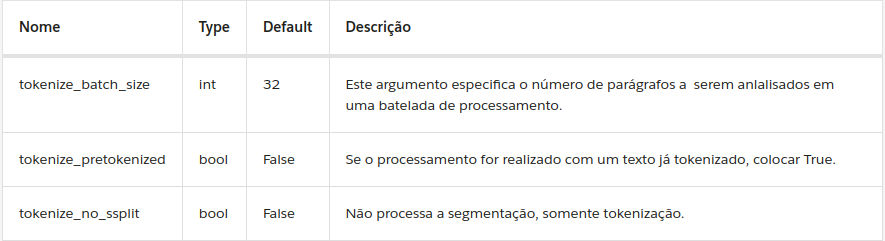

## Exemplo de Usabilidade
A utilização do TokenizeProcessor  geralmente é a primeira etapa do processo.  Após essa aplicação, o documento se torna uma lista de tokens e sentenças. Em cada lista de sentença é possível acessar os tokens individualmente.Tokenization and Sentence Segmentation

A seguir um exemplo deste processamento:

In [3]:
! pip install stanza

     |████████████████████████████████| 574 kB 5.4 MB/s 
     |████████████████████████████████| 175 kB 52.9 MB/s 
     |████████████████████████████████| 4.0 MB 49.2 MB/s 
     |████████████████████████████████| 6.6 MB 47.1 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 
     |████████████████████████████████| 895 kB 60.7 MB/s 
     |████████████████████████████████| 596 kB 38.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=1adc1eb52a124f968ecfdb292c7ae1a95293f283070328472e3374dedaade2af
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import stanza 
nlp = stanza.Pipeline(lang='en', processors='tokenize') 
doc = nlp('This is a test sentence for stanza. This is another sentence.') 
for i, sentence in enumerate(doc.sentences):     
    print(f'====== Sentence {i+1} tokens =======')     
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-04-29 00:08:08 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-04-29 00:08:08 INFO: Use device: cpu
2022-04-29 00:08:08 INFO: Loading: tokenize
2022-04-29 00:08:08 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: test
id: (5,)	text: sentence
id: (6,)	text: for
id: (7,)	text: stanza
id: (8,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: another
id: (4,)	text: sentence
id: (5,)	text: .


Para acessar somente a segmentação de sentenças é possível fazendo:

In [5]:
print([sentence.text for sentence in doc.sentences])

['This is a test sentence for stanza.', 'This is another sentence.']


A saída do código quando exclui-se a segmentação de sentença proporciona somente 2 sentenças definidas, tal como pode ser observado abaixo.

In [6]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_no_ssplit=True)
doc = nlp('This is a sentence.\n\nThis is a second. This is a third.')
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-04-29 00:09:33 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-04-29 00:09:33 INFO: Use device: cpu
2022-04-29 00:09:33 INFO: Loading: tokenize
2022-04-29 00:09:33 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: sentence
id: (5,)	text: .
====== Sentence 2 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: a
id: (4,)	text: second
id: (5,)	text: .
id: (6,)	text: This
id: (7,)	text: is
id: (8,)	text: a
id: (9,)	text: third
id: (10,)	text: .


Quando a segmentação de sentença é setada (default), a saída é de acordo com:

```python
====== Sentence 1 tokens ======= 
id: 1   text: This 
id: 2   text: is 
id: 3   text: a 
id: 4   text: sentence 
id: 5   text: . 
====== Sentence 2 tokens ======= 
id: 1   text: This 
id: 2   text: is 
id: 3   text: a 
id: 4   text: second 
id: 5   text: . 
====== Sentence 3 tokens ======= 
id: 1   text: This 
id: 2   text: is 
id: 3   text: a 
id: 4   text: third 
id: 5   text: .
```

## Processar texto pré-tokenizado
Em alguns casos o texto pode está já tokenizado. Neste caso, é possível utilziar somente a segmentação de sentenças, bata  setar  `tokenize_pretokenized` como  `True`:

In [7]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_pretokenized=True)
doc = nlp('This is token.ization done my way!\nSentence split, too!')
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-04-29 00:11:26 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-04-29 00:11:26 INFO: Use device: cpu
2022-04-29 00:11:26 INFO: Loading: tokenize
2022-04-29 00:11:26 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: token.ization
id: (4,)	text: done
id: (5,)	text: my
id: (6,)	text: way!
====== Sentence 2 tokens =======
id: (1,)	text: Sentence
id: (2,)	text: split,
id: (3,)	text: too!


Um alternativa é utilziar uma lista de stings:

In [8]:
import stanza
nlp = stanza.Pipeline(lang='en', processors='tokenize', tokenize_pretokenized=True)
doc = nlp([['This', 'is', 'token.ization', 'done', 'my', 'way!'], ['Sentence', 'split,', 'too!']])
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

2022-04-29 00:11:46 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |

2022-04-29 00:11:46 INFO: Use device: cpu
2022-04-29 00:11:46 INFO: Loading: tokenize
2022-04-29 00:11:46 INFO: Done loading processors!


====== Sentence 1 tokens =======
id: (1,)	text: This
id: (2,)	text: is
id: (3,)	text: token.ization
id: (4,)	text: done
id: (5,)	text: my
id: (6,)	text: way!
====== Sentence 2 tokens =======
id: (1,)	text: Sentence
id: (2,)	text: split,
id: (3,)	text: too!


Segue a saída com ```tokenize_pretokenized=True```

```python
====== Sentence 1 tokens =======
id: 1   text: This 
id: 2   text: is 
id: 3   text: token.ization 
id: 4   text: done 
id: 5   text: my 
id: 6   text: way! 
====== Sentence 2 tokens ======= 
id: 1   text: Sentence 
id: 2   text: split, 
id: 3   text: too!
```

Segue a saída com `tokenize_pretokenized=False`

```python
====== Sentence 1 tokens ======= 
id: 1   text: This 
id: 2   text: is 
id: 3   text: token 
id: 4   text: . 
id: 5   text: ization 
id: 6   text: done 
id: 7   text: my 
id: 8   text: way 
id: 9   text: ! 
====== Sentence 2 tokens ======= 
id: 1   text: Sentence 
id: 2   text: split 
id: 3   text: , 
id: 4   text: too 
id: 5   text: !
```